## Observations and Insights

## Dependencies and starter code

In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
results_df = pd.DataFrame(study_results)
combined_data = pd.merge(left=results_df, right=mouse_df, how="left", on="Mouse ID")
combined_data



Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1893 rows x 8 columns]

## Summary statistics

In [202]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = pd.DataFrame()
summary_stats["Tumor Volume (Mean)"] = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_stats["Tumor Volume (Median)"] = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stats["Tumor Volume (Variance)"] = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stats["Tumor Volume (STD)"] = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_stats["Tumor Volume (SEM)"] = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stats
   

Tumor Volume (Mean)  Tumor Volume (Median)  \
Drug Regimen                                               
Capomulin               40.675741              41.557809   
Ceftamin                52.591172              51.776157   
Infubinol               52.884795              51.820584   
Ketapril                55.235638              53.698743   
Naftisol                54.331565              52.509285   
Placebo                 54.033581              52.288934   
Propriva                52.322552              50.854632   
Ramicane                40.216745              40.673236   
Stelasyn                54.233149              52.431737   
Zoniferol               53.236507              51.818479   

              Tumor Volume (Variance)  Tumor Volume (STD)  Tumor Volume (SEM)  
Drug Regimen                                                                   
Capomulin                   24.947764            4.994774            0.329346  
Ceftamin                    39.290177            6.268188            0.469821  
Infubinol                   43.128684            6.567243            0.492236  
Ketapril                    68.553577            8.279709            0.603860  
Naftisol                    66.173479            8.134708            0.596466  
Placebo                     61.168083            7.821003            0.581331  
Propriva                    42.351070            6.507770            0.512884  
Ramicane                    23.486704            4.846308            0.320955  
Stelasyn                    59.450562            7.710419            0.573111  
Zoniferol                   48.533355            6.966589            0.516398

## Bar plots

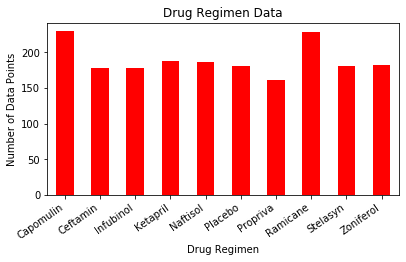

In [203]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

regimen_data = combined_data.groupby("Drug Regimen").count()
regimen_data = regimen_data["Mouse ID"]
bar_data = pd.DataFrame(regimen_data)
bar_data.rename(columns = {"Mouse ID":"Data Points"}, inplace=True)
bar_data = bar_data.reset_index()

bar_data.plot(title = "Drug Regimen Data", x = "Drug Regimen", y = "Data Points", kind = "bar", color = "red", width = .5, legend = False)
plt.ylabel("Number of Data Points", rotation = 90)
plt.xticks(rotation = 35, horizontalalignment = "right")
plt.tight_layout(pad=2)
plt.show()

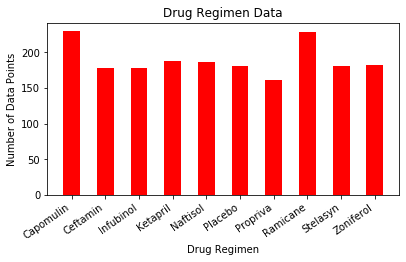

In [204]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points = bar_data["Data Points"]
x_axis = bar_data["Drug Regimen"]
plt.bar(x_axis, data_points, color = "red", width = .5)
plt.title("Drug Regimen Data")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 35, horizontalalignment = "right")
plt.tight_layout(pad=2)

## Pie plots

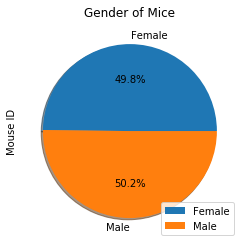

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_df.groupby(["Sex"]).count()
mouse_sex.plot(kind = "pie", y = "Mouse ID", title = "Gender of Mice", autopct = "%1.1f%%", shadow = True).legend(loc = "lower right")

                                   




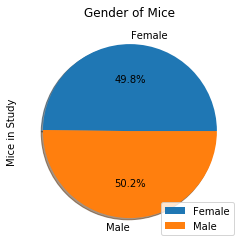

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = mouse_sex["Mouse ID"]
labels = ["Female", "Male"]
plt.pie(sizes, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title("Gender of Mice")
plt.ylabel("Mice in Study")
plt.legend(loc = "lower right")

## Quartiles, outliers and boxplots

In [405]:
recombined_data = combined_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen", "Mouse ID"]).last().reset_index()
#recombined_data
capomulin_data = recombined_data.loc[recombined_data["Drug Regimen"] == "Capomulin", :].reset_index()
ceftamin_data = recombined_data.loc[recombined_data["Drug Regimen"] == "Ceftamin", :].reset_index()
infubinol_data = recombined_data.loc[recombined_data["Drug Regimen"] == "Infubinol", :].reset_index()
ramicane_data = recombined_data.loc[recombined_data["Drug Regimen"] == "Ramicane", :].reset_index()

capomulin_volumes = capomulin_data["Tumor Volume (mm3)"]
ceftamin_volumes = ceftamin_data["Tumor Volume (mm3)"]
infubinol_volumes = infubinol_data["Tumor Volume (mm3)"]
ramicane_volumes = ramicane_data["Tumor Volume (mm3)"]

#ftv_data = pd.DataFrame({"Capomulin FTV": capomulin_volumes, "Ceftamin FTV": ceftamin_volumes, "Infubinol FTV": infubinol_volumes, "Ramicane FTV": ramicane_volumes})

quartiles = capomulin_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor volumes is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor volumes is: {upperq}")
print(f"The interquartile range of Capomulin final tumor volumes is: {iqr}")
print(f"The the median of Capomulin final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#for volume in capomulin_volumes:
    #if volume > upper_bound:
        #print("There appear to be one or more outliers.")
    #else:
        #if volume > upper_bound:
            #print("There appear to be one or more outliers.")
        #else:
            #print("There do not appear to be any outliers.")
print("\n")

quartiles = ceftamin_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin final tumor volumes is: {lowerq}")
print(f"The upper quartile of Ceftamin final tumor volumes is: {upperq}")
print(f"The interquartile range of Ceftamin final tumor volumes is: {iqr}")
print(f"The the median of Ceftamin final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")

quartiles = infubinol_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol final tumor volumes is: {lowerq}")
print(f"The upper quartile of Infubinol final tumor volumes is: {upperq}")
print(f"The interquartile range of Infubinol final tumor volumes is: {iqr}")
print(f"The the median of Infubinol final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")

quartiles = ramicane_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane final tumor volumes is: {lowerq}")
print(f"The upper quartile of Ramicane final tumor volumes is: {upperq}")
print(f"The interquartile range of Ramicane final tumor volumes is: {iqr}")
print(f"The the median of Ramicane final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")






The lower quartile of Capomulin final tumor volumes is: 32.37735684
The upper quartile of Capomulin final tumor volumes is: 40.1592203
The interquartile range of Capomulin final tumor volumes is: 7.781863460000004
The the median of Capomulin final tumor volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


The lower quartile of Ceftamin final tumor volumes is: 48.72207785
The upper quartile of Ceftamin final tumor volumes is: 64.29983003
The interquartile range of Ceftamin final tumor volumes is: 15.577752179999997
The the median of Ceftamin final tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


The lower quartile of Infubinol final tumor volumes is: 54.04860769
The upper quartile of Infubinol final tumor volumes is: 65.52574285
The interquartile range of Infubinol final tumor volumes is: 11.477135160000003
The the median of Infu

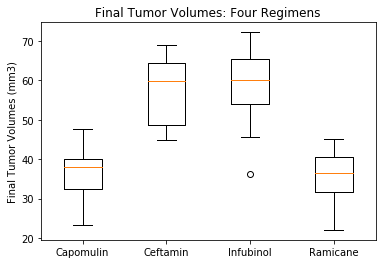

In [411]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin_volumes, ceftamin_volumes, infubinol_volumes, ramicane_volumes])
plt.ylabel("Final Tumor Volumes (mm3)")
plt.xticks([1,2,3,4],["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
plt.title("Final Tumor Volumes: Four Regimens")
plt.show()


## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen